In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns;
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
sns.set()

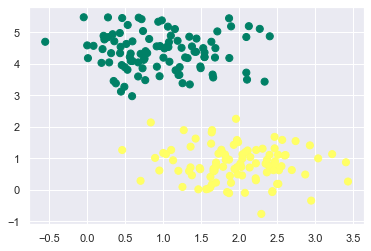

In [3]:
X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer');

In [4]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


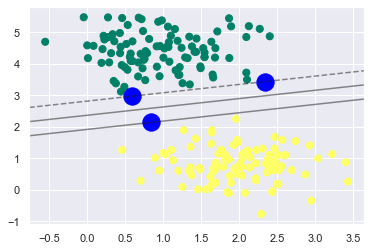

In [5]:
def plot_svc(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.linspace(xlim[0],xlim[1],200)
    y=np.linspace(ylim[0],ylim[1],200)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    p=model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,p,colors='k',levels=[-1,0,1],alpha=0.5,linestypes=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='blue');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plot_svc(model);

In [6]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


Text(0.5, 1.0, 'N=100')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


Text(0.5, 1.0, 'N=200')

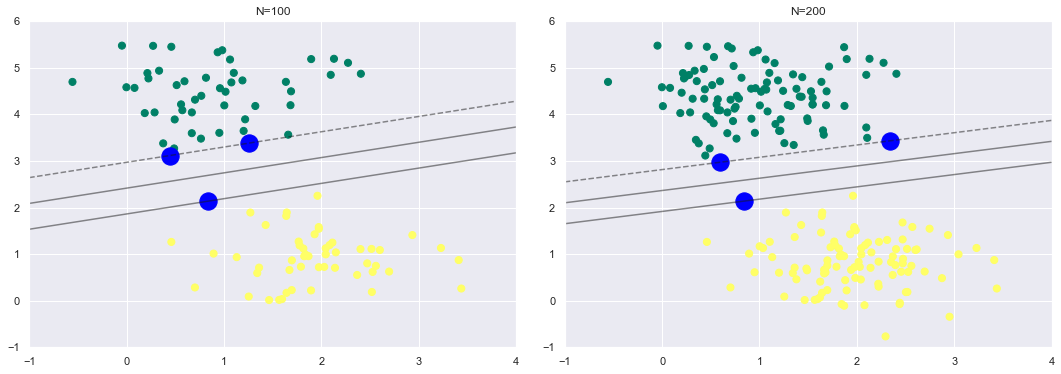

In [7]:
def plot_svm(N=200,ax=None):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)
    X=X[:N]
    y=y[:N]
    model=SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc(model,ax)
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[100,200]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


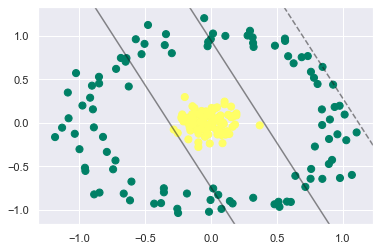

In [8]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(200,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plot_svc(clf,plot_support=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


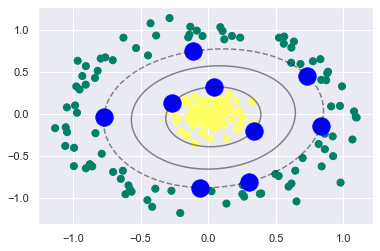

In [9]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(200,factor=0.1,noise=0.1)
clf=SVC(kernel='rbf',C=1E6).fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plot_svc(clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


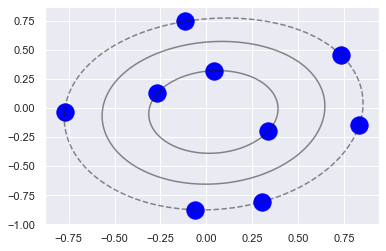

In [10]:
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolor='none');
clf.fit(X,y)
plot_svc(clf)

In [11]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

In [13]:
model=LinearSVC()
model.fit(train_X,train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [18]:
result=model.predict(test_X)
accuracy=accuracy_score(result,test_y)
print("Accuracy = {}%".format(accuracy*100))

Accuracy = 36.0%


In [19]:
misclassified=(test_y!=result).sum()
print("Misclassified = ",misclassified)

Misclassified =  32
